In [1]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Python/machine_learning/Signate/sony/file/train_seikei.csv', index_col='id')
test_ori = pd.read_csv('/content/drive/MyDrive/Python/machine_learning/Signate/sony/file/test.csv')
test = pd.read_csv('/content/drive/MyDrive/Python/machine_learning/Signate/sony/file/test_seikei.csv', index_col='id')

In [5]:
train = train.round(3)

In [6]:
test = test.round(3)

In [7]:
train.head()

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
id,,,,,,,,,,,,,,,,,,,,,
1,2019,1,1,Australia,Brisbane,-27.468,153.028,38,0.749,2.590,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
2,2019,1,1,Australia,Darwin,-12.461,130.842,47,2.594,3.181,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
3,2019,1,1,Australia,Melbourne,-37.814,144.963,17,1.190,1.197,...,0.467,3.039,7.576,10.571,22,10.309,13.133,15.422,6.355,25.918
4,2019,1,1,Australia,Newcastle,-32.930,151.780,63,4.586,11.044,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
5,2019,1,1,Australia,Perth,-31.952,115.861,47,4.689,8.681,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063


In [54]:
test.head()

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,2019,1,1,0,2,-34.929,138.599,155,0.091,0.101,...,0.098,2.411,10.213,24.608,26,3.057,8.180,15.841,39.705,NaN
1,2019,1,1,0,243,-33.868,151.207,23,1.037,2.272,...,0.101,2.982,8.261,15.957,47,11.090,15.361,19.227,15.857,NaN
2,2019,1,1,1,25,50.850,4.349,28,0.096,0.101,...,0.218,1.200,5.802,7.584,44,1.055,4.411,6.955,8.415,NaN
3,2019,1,1,2,225,43.849,18.356,122,0.479,4.589,...,0.504,1.172,3.861,2.696,16,0.482,0.484,0.932,0.049,NaN
4,2019,1,1,3,246,-23.179,-45.887,158,6.198,13.478,...,0.409,1.412,3.132,1.754,165,6.253,11.440,12.473,3.546,NaN


In [11]:
train_labels=list(train.columns)
print(train_labels)
test_labels=list(test.columns)
print(test_labels)

['year', 'month', 'day', 'Country', 'City', 'lat', 'lon', 'co_cnt', 'co_min', 'co_mid', 'co_max', 'co_var', 'o3_cnt', 'o3_min', 'o3_mid', 'o3_max', 'o3_var', 'so2_cnt', 'so2_min', 'so2_mid', 'so2_max', 'so2_var', 'no2_cnt', 'no2_min', 'no2_mid', 'no2_max', 'no2_var', 'temperature_cnt', 'temperature_min', 'temperature_mid', 'temperature_max', 'temperature_var', 'humidity_cnt', 'humidity_min', 'humidity_mid', 'humidity_max', 'humidity_var', 'pressure_cnt', 'pressure_min', 'pressure_mid', 'pressure_max', 'pressure_var', 'ws_cnt', 'ws_min', 'ws_mid', 'ws_max', 'ws_var', 'dew_cnt', 'dew_min', 'dew_mid', 'dew_max', 'dew_var', 'pm25_mid']
['year', 'month', 'day', 'Country', 'City', 'lat', 'lon', 'co_cnt', 'co_min', 'co_mid', 'co_max', 'co_var', 'o3_cnt', 'o3_min', 'o3_mid', 'o3_max', 'o3_var', 'so2_cnt', 'so2_min', 'so2_mid', 'so2_max', 'so2_var', 'no2_cnt', 'no2_min', 'no2_mid', 'no2_max', 'no2_var', 'temperature_cnt', 'temperature_min', 'temperature_mid', 'temperature_max', 'temperature_var

In [12]:
# 予測対象のカラムを抽出
target=train_labels
for i in test_labels:
    target.remove(i)
target

['pm25_mid']

In [13]:
feats=test_labels
train[feats]

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
id,,,,,,,,,,,,,,,,,,,,,
1,2019,1,1,Australia,Brisbane,-27.468,153.028,38,0.749,2.590,...,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424
2,2019,1,1,Australia,Darwin,-12.461,130.842,47,2.594,3.181,...,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021
3,2019,1,1,Australia,Melbourne,-37.814,144.963,17,1.190,1.197,...,125,0.467,3.039,7.576,10.571,22,10.309,13.133,15.422,6.355
4,2019,1,1,Australia,Newcastle,-32.930,151.780,63,4.586,11.044,...,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417
5,2019,1,1,Australia,Perth,-31.952,115.861,47,4.689,8.681,...,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195937,2021,12,31,United States,Jacksonville,30.332,-81.656,12,0.694,0.995,...,22,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252
195938,2021,12,31,United States,Las Vegas,36.175,-115.137,14,0.528,1.256,...,51,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078
195939,2021,12,31,United States,Milwaukee,43.039,-87.906,171,1.975,6.627,...,125,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286


In [14]:
train[target]

,pm25_mid
id,
1,19.901
2,13.741
3,25.918
4,174.370
5,167.063
...,...
195937,16.150
195938,16.895
195939,86.299


In [15]:
# Cityの値一覧を取得
City_train_all = train['City'].unique().tolist()
City_test_all = test['City'].unique().tolist()

In [16]:
# LabelEncoding
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, GroupKFold

#trainとtestを結合
data=pd.concat([train,test])
#labelencoding
feat=data.columns
catfeats= list(data.select_dtypes(include= "object").columns) #objectのカラムをリストに入れる
le= LabelEncoder() #ラベルエンコーダーをインスタンス化して使えるようにする
labels={}
for feat in catfeats:
    le.fit(data[feat].astype(str))
    label={feat:list(le.classes_)}
    labels.update(label)
    data[feat]=le.transform(data[feat].astype(str))
#trainとtestを分割
train=data[data['pm25_mid'].notna()]
test=data[data['pm25_mid'].isna()]

In [17]:
train

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
id,,,,,,,,,,,,,,,,,,,,,
1,2019,1,1,0,24,-27.468,153.028,38,0.749,2.590,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
2,2019,1,1,0,54,-12.461,130.842,47,2.594,3.181,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
3,2019,1,1,0,146,-37.814,144.963,17,1.190,1.197,...,0.467,3.039,7.576,10.571,22,10.309,13.133,15.422,6.355,25.918
4,2019,1,1,0,176,-32.930,151.780,63,4.586,11.044,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
5,2019,1,1,0,193,-31.952,115.861,47,4.689,8.681,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195937,2021,12,31,28,103,30.332,-81.656,12,0.694,0.995,...,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252,16.150
195938,2021,12,31,28,133,36.175,-115.137,14,0.528,1.256,...,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078,16.895
195939,2021,12,31,28,150,43.039,-87.906,171,1.975,6.627,...,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286,86.299


In [18]:
test

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
id,,,,,,,,,,,,,,,,,,,,,
195942,2019,1,1,0,2,-34.929,138.599,155,0.091,0.101,...,0.098,2.411,10.213,24.608,26,3.057,8.180,15.841,39.705,NaN
195943,2019,1,1,0,243,-33.868,151.207,23,1.037,2.272,...,0.101,2.982,8.261,15.957,47,11.090,15.361,19.227,15.857,NaN
195944,2019,1,1,1,25,50.850,4.349,28,0.096,0.101,...,0.218,1.200,5.802,7.584,44,1.055,4.411,6.955,8.415,NaN
195945,2019,1,1,2,225,43.849,18.356,122,0.479,4.589,...,0.504,1.172,3.861,2.696,16,0.482,0.484,0.932,0.049,NaN
195946,2019,1,1,3,246,-23.179,-45.887,158,6.198,13.478,...,0.409,1.412,3.132,1.754,165,6.253,11.440,12.473,3.546,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249446,2021,12,31,26,0,36.986,35.325,97,4.674,9.034,...,0.201,2.878,7.397,12.130,86,0.451,3.112,4.512,3.938,NaN
249447,2021,12,31,26,28,40.196,29.060,123,17.621,18.156,...,0.473,1.491,2.974,1.468,115,3.894,6.823,6.861,2.145,NaN
249448,2021,12,31,26,266,41.005,39.727,150,0.128,14.275,...,1.001,3.605,5.040,3.965,12,5.269,8.772,12.661,13.201,NaN


In [19]:
# pm2.5が0の行を削除
train_df = train[train['pm25_mid'] != 0]

In [20]:
train.shape

(195941, 53)

In [21]:
train_df.shape

(195471, 53)

In [22]:
train_df = train_df.reset_index(drop=True)
test = test.reset_index(drop=True)

In [23]:
train_df.head()

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,2019,1,1,0,24,-27.468,153.028,38,0.749,2.590,...,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901
1,2019,1,1,0,54,-12.461,130.842,47,2.594,3.181,...,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741
2,2019,1,1,0,146,-37.814,144.963,17,1.190,1.197,...,0.467,3.039,7.576,10.571,22,10.309,13.133,15.422,6.355,25.918
3,2019,1,1,0,176,-32.930,151.780,63,4.586,11.044,...,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370
4,2019,1,1,0,193,-31.952,115.861,47,4.689,8.681,...,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063


In [24]:
test.head()

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid
0,2019,1,1,0,2,-34.929,138.599,155,0.091,0.101,...,0.098,2.411,10.213,24.608,26,3.057,8.180,15.841,39.705,NaN
1,2019,1,1,0,243,-33.868,151.207,23,1.037,2.272,...,0.101,2.982,8.261,15.957,47,11.090,15.361,19.227,15.857,NaN
2,2019,1,1,1,25,50.850,4.349,28,0.096,0.101,...,0.218,1.200,5.802,7.584,44,1.055,4.411,6.955,8.415,NaN
3,2019,1,1,2,225,43.849,18.356,122,0.479,4.589,...,0.504,1.172,3.861,2.696,16,0.482,0.484,0.932,0.049,NaN
4,2019,1,1,3,246,-23.179,-45.887,158,6.198,13.478,...,0.409,1.412,3.132,1.754,165,6.253,11.440,12.473,3.546,NaN


In [25]:
# testデータでco_min co_mid o3_min o3_midが0のデータはpm2.5を0と予測する。
testId = []
for id, a, b, c, d in zip(test_ori['id'], test_ori['co_min'], test_ori['co_mid'], test_ori['o3_min'], test_ori['o3_mid']):
    if (a + b + c+ d) == 0:
      testId.append(id)

In [26]:
len(testId)

106

In [27]:
# KFold
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, shuffle = True)
train_df["fold"] = -1
for fold, (train_idx, valid_idx) in enumerate(kf.split(train_df)):
    train_df.loc[valid_idx, "fold"] = fold
print(train_df["fold"].value_counts())

0    39095
4    39094
1    39094
2    39094
3    39094
Name: fold, dtype: int64


In [28]:
train_df.head()

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var,pm25_mid,fold
0,2019,1,1,0,24,-27.468,153.028,38,0.749,2.590,...,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424,19.901,4
1,2019,1,1,0,54,-12.461,130.842,47,2.594,3.181,...,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021,13.741,1
2,2019,1,1,0,146,-37.814,144.963,17,1.190,1.197,...,3.039,7.576,10.571,22,10.309,13.133,15.422,6.355,25.918,2
3,2019,1,1,0,176,-32.930,151.780,63,4.586,11.044,...,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417,174.370,4
4,2019,1,1,0,193,-31.952,115.861,47,4.689,8.681,...,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109,167.063,4


In [29]:
fold = 0
train = train_df.loc[train_df["fold"] != fold].copy()
valid = train_df.loc[train_df["fold"] == fold].copy()
print(train.shape, valid.shape)

(156376, 54) (39095, 54)


In [30]:
feat_cols = train.drop(columns = ["fold", "pm25_mid"]).columns.tolist()
print(feat_cols)

X_train = train[feat_cols]
X_valid = valid[feat_cols]
y_train = train["pm25_mid"]
y_valid = valid["pm25_mid"]

['year', 'month', 'day', 'Country', 'City', 'lat', 'lon', 'co_cnt', 'co_min', 'co_mid', 'co_max', 'co_var', 'o3_cnt', 'o3_min', 'o3_mid', 'o3_max', 'o3_var', 'so2_cnt', 'so2_min', 'so2_mid', 'so2_max', 'so2_var', 'no2_cnt', 'no2_min', 'no2_mid', 'no2_max', 'no2_var', 'temperature_cnt', 'temperature_min', 'temperature_mid', 'temperature_max', 'temperature_var', 'humidity_cnt', 'humidity_min', 'humidity_mid', 'humidity_max', 'humidity_var', 'pressure_cnt', 'pressure_min', 'pressure_mid', 'pressure_max', 'pressure_var', 'ws_cnt', 'ws_min', 'ws_mid', 'ws_max', 'ws_var', 'dew_cnt', 'dew_min', 'dew_mid', 'dew_max', 'dew_var']


In [31]:
X_train

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
0,2019,1,1,0,24,-27.468,153.028,38,0.749,2.590,...,42,0.241,1.088,3.101,1.983,17,7.671,10.358,15.112,13.424
1,2019,1,1,0,54,-12.461,130.842,47,2.594,3.181,...,48,0.828,3.473,7.396,10.411,62,21.324,23.813,24.221,2.021
2,2019,1,1,0,146,-37.814,144.963,17,1.190,1.197,...,125,0.467,3.039,7.576,10.571,22,10.309,13.133,15.422,6.355
3,2019,1,1,0,176,-32.930,151.780,63,4.586,11.044,...,52,0.284,0.503,3.592,2.485,116,7.146,10.685,13.344,9.417
4,2019,1,1,0,193,-31.952,115.861,47,4.689,8.681,...,102,0.500,0.755,3.396,1.937,93,1.091,3.277,12.272,4.109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195466,2021,12,31,28,103,30.332,-81.656,12,0.694,0.995,...,22,2.195,2.710,6.125,3.757,12,16.774,22.679,26.058,13.252
195467,2021,12,31,28,133,36.175,-115.137,14,0.528,1.256,...,51,1.002,2.974,6.861,8.354,12,10.432,14.741,15.827,7.078
195468,2021,12,31,28,150,43.039,-87.906,171,1.975,6.627,...,125,0.994,1.087,2.578,0.612,26,2.049,3.531,6.686,5.286
195469,2021,12,31,29,88,21.024,105.841,31,2.613,2.704,...,266,1.005,3.058,6.005,6.085,51,1.922,7.443,7.716,4.642


In [32]:
X_valid

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
7,2019,1,1,1,38,50.411,4.444,11,0.096,0.097,...,122,0.203,2.457,4.390,4.263,117,1.968,4.539,6.519,4.994
9,2019,1,1,3,247,-23.548,-46.636,354,1.048,2.822,...,577,0.198,1.419,3.956,3.415,145,17.233,18.791,21.665,4.742
22,2019,1,1,6,79,26.583,106.717,152,5.705,7.781,...,135,0.498,1.489,2.447,0.917,193,6.051,8.953,14.934,18.441
23,2019,1,1,6,84,20.046,110.342,16,3.545,6.003,...,41,0.336,0.998,3.863,2.814,31,4.009,6.032,10.009,2.117
26,2019,1,1,6,90,31.864,117.281,159,2.175,6.064,...,209,0.502,1.480,2.059,0.591,51,-3.444,2.999,4.595,15.614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195437,2021,12,31,23,189,39.569,2.650,117,0.971,4.584,...,267,0.495,1.984,4.221,3.375,248,5.615,5.852,9.242,3.169
195445,2021,12,31,24,252,22.758,121.144,46,2.728,4.186,...,50,0.895,1.652,3.503,1.637,24,12.811,13.034,14.719,0.858
195450,2021,12,31,25,166,13.820,100.044,46,0.101,0.107,...,46,0.311,2.560,7.618,12.760,24,17.983,18.868,22.148,4.026
195451,2021,12,31,25,210,12.681,101.258,69,0.096,0.101,...,123,0.947,3.057,6.762,7.714,108,17.678,19.505,22.286,5.166


In [33]:
y_train

0          19.901
1          13.741
2          25.918
3         174.370
4         167.063
           ...   
195466     16.150
195467     16.895
195468     86.299
195469     36.523
195470     62.021
Name: pm25_mid, Length: 156376, dtype: float64

In [34]:
y_valid.shape

(39095,)

In [58]:
test_x = test.copy()
test_x = test_x[feats]

In [59]:
test_x.head()

,year,month,day,Country,City,lat,lon,co_cnt,co_min,co_mid,...,ws_cnt,ws_min,ws_mid,ws_max,ws_var,dew_cnt,dew_min,dew_mid,dew_max,dew_var
0,2019,1,1,0,2,-34.929,138.599,155,0.091,0.101,...,111,0.098,2.411,10.213,24.608,26,3.057,8.180,15.841,39.705
1,2019,1,1,0,243,-33.868,151.207,23,1.037,2.272,...,158,0.101,2.982,8.261,15.957,47,11.090,15.361,19.227,15.857
2,2019,1,1,1,25,50.850,4.349,28,0.096,0.101,...,64,0.218,1.200,5.802,7.584,44,1.055,4.411,6.955,8.415
3,2019,1,1,2,225,43.849,18.356,122,0.479,4.589,...,149,0.504,1.172,3.861,2.696,16,0.482,0.484,0.932,0.049
4,2019,1,1,3,246,-23.179,-45.887,158,6.198,13.478,...,164,0.409,1.412,3.132,1.754,165,6.253,11.440,12.473,3.546


In [37]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_log_error

In [45]:
# lightGBM
params = {
        "objective" : "regression",
        "metric" : "rmse",
        "num_leaves" : 40,
        "learning_rate" : 0.004,
        "bagging_fraction" : 0.6,
        "feature_fraction" : 0.6,
        "bagging_frequency" : 6,
        "bagging_seed" : 42,
        'verbose': -1,
        "seed": 42
}
verbose_eval = 1
lgtrain = lgb.Dataset(X_train, label=y_train)
lgval = lgb.Dataset(X_valid, label=y_valid)

In [48]:
results_dict = {}
model = lgb.train(params, lgtrain, 40000,
                  valid_sets=[lgtrain, lgval],
                  callbacks=[lgb.early_stopping(stopping_rounds=100,verbose=True),lgb.log_evaluation(verbose_eval)]
)

ストリーミング出力は最後の 5000 行に切り捨てられました。
[35003]	training's rmse: 13.0674	valid_1's rmse: 19.3139
[35004]	training's rmse: 13.0674	valid_1's rmse: 19.3139
[35005]	training's rmse: 13.0673	valid_1's rmse: 19.3139
[35006]	training's rmse: 13.0671	valid_1's rmse: 19.3139
[35007]	training's rmse: 13.067	valid_1's rmse: 19.3139
[35008]	training's rmse: 13.0669	valid_1's rmse: 19.3139
[35009]	training's rmse: 13.0667	valid_1's rmse: 19.3139
[35010]	training's rmse: 13.0666	valid_1's rmse: 19.3138
[35011]	training's rmse: 13.0666	valid_1's rmse: 19.3139
[35012]	training's rmse: 13.0665	valid_1's rmse: 19.3138
[35013]	training's rmse: 13.0664	valid_1's rmse: 19.3138
[35014]	training's rmse: 13.0663	valid_1's rmse: 19.3138
[35015]	training's rmse: 13.0661	valid_1's rmse: 19.3138
[35016]	training's rmse: 13.0659	valid_1's rmse: 19.3138
[35017]	training's rmse: 13.0658	valid_1's rmse: 19.3138
[35018]	training's rmse: 13.0656	valid_1's rmse: 19.3138
[35019]	training's rmse: 13.0655	valid_1's rmse: 19.3138


optuna(ハイパーパラメータの自動最適化フレームワーク)を使用する場合

In [ ]:
# !pip install optuna -q

     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 81 kB 7.9 MB/s 
     |████████████████████████████████| 210 kB 57.3 MB/s 
     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 146 kB 54.0 MB/s 
     |████████████████████████████████| 112 kB 20.9 MB/s 
     |████████████████████████████████| 49 kB 4.7 MB/s 


In [ ]:
# import optuna.integration.lightgbm as lgbo

In [ ]:
# results_dict = {}
# model = lgb.train(params, lgtrain, 40000,
#                   valid_sets=[lgtrain, lgval],
#                   early_stopping_rounds=100,
#                   verbose_eval=150,
#                   evals_result=results_dict)

In [ ]:
# results_dict = {}
# model = lgbo.train(params ,
#                     lgtrain ,
#                     valid_sets=[lgtrain , lgval] ,
#                     categorical_feature=catfeats,
#                     # num_boost_round=200,  # 勾配ブースティングのイテレーションの回数、初期値=1000
#                     early_stopping_rounds=100,
#                     verbose_eval=100,     # ログ表示数　最後の1つだけ表示=-1
#                     evals_result=results_dict
#                     )

# best_params = model.params
# best_params

[I 2022-05-09 10:36:06,961] A new study created in memory with name: no-name-242eb7f8-77b1-48d4-aa39-9f5198a25997
feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 19.0946	valid_1's rmse: 20.0952
[200]	valid_0's rmse: 17.8925	valid_1's rmse: 19.6929
[300]	valid_0's rmse: 17.1188	valid_1's rmse: 19.5638
[400]	valid_0's rmse: 16.5321	valid_1's rmse: 19.4996
[500]	valid_0's rmse: 16.0093	valid_1's rmse: 19.4602
[600]	valid_0's rmse: 15.5234	valid_1's rmse: 19.4303
[700]	valid_0's rmse: 15.0917	valid_1's rmse: 19.4177
[800]	valid_0's rmse: 14.6934	valid_1's rmse: 19.4057
[900]	valid_0's rmse: 14.3251	valid_1's rmse: 19.3971
[1000]	valid_0's rmse: 13.9886	valid_1's rmse: 19.3955
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 13.9886	valid_1's rmse: 19.3955


feature_fraction, val_score: 19.395470:  14%|#4        | 1/7 [01:28<08:49, 88.23s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 19.2981	valid_1's rmse: 20.1483
[200]	valid_0's rmse: 18.1409	valid_1's rmse: 19.7425
[300]	valid_0's rmse: 17.4334	valid_1's rmse: 19.5932
[400]	valid_0's rmse: 16.8566	valid_1's rmse: 19.5176
[500]	valid_0's rmse: 16.3424	valid_1's rmse: 19.4818
[600]	valid_0's rmse: 15.8859	valid_1's rmse: 19.4542
[700]	valid_0's rmse: 15.4696	valid_1's rmse: 19.4407
[800]	valid_0's rmse: 15.0898	valid_1's rmse: 19.4191
[900]	valid_0's rmse: 14.7427	valid_1's rmse: 19.4013
[1000]	valid_0's rmse: 14.4164	valid_1's rmse: 19.3947
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 14.4164	valid_1's rmse: 19.3947


feature_fraction, val_score: 19.394678:  29%|##8       | 2/7 [01:58<04:30, 54.15s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 19.488	valid_1's rmse: 20.1545
[200]	valid_0's rmse: 18.4528	valid_1's rmse: 19.7388
[300]	valid_0's rmse: 17.8021	valid_1's rmse: 19.5952
[400]	valid_0's rmse: 17.2576	valid_1's rmse: 19.5131
[500]	valid_0's rmse: 16.7946	valid_1's rmse: 19.4569
[600]	valid_0's rmse: 16.3483	valid_1's rmse: 19.4056
[700]	valid_0's rmse: 15.9495	valid_1's rmse: 19.381
[800]	valid_0's rmse: 15.597	valid_1's rmse: 19.3535
[900]	valid_0's rmse: 15.2587	valid_1's rmse: 19.3317
[1000]	valid_0's rmse: 14.9397	valid_1's rmse: 19.3172
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 14.9397	valid_1's rmse: 19.3172


feature_fraction, val_score: 19.317213:  43%|####2     | 3/7 [02:21<02:39, 39.78s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 19.1654	valid_1's rmse: 20.1295
[200]	valid_0's rmse: 18.0095	valid_1's rmse: 19.7518
[300]	valid_0's rmse: 17.2672	valid_1's rmse: 19.6186
[400]	valid_0's rmse: 16.6681	valid_1's rmse: 19.5526
[500]	valid_0's rmse: 16.1693	valid_1's rmse: 19.5054
[600]	valid_0's rmse: 15.6913	valid_1's rmse: 19.4678
[700]	valid_0's rmse: 15.2633	valid_1's rmse: 19.4597
[800]	valid_0's rmse: 14.8642	valid_1's rmse: 19.4513
[900]	valid_0's rmse: 14.4879	valid_1's rmse: 19.436
[1000]	valid_0's rmse: 14.1606	valid_1's rmse: 19.4226
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 14.1606	valid_1's rmse: 19.4226


feature_fraction, val_score: 19.317213:  57%|#####7    | 4/7 [02:56<01:53, 37.96s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 18.9359	valid_1's rmse: 20.1227
[200]	valid_0's rmse: 17.6641	valid_1's rmse: 19.7603
[300]	valid_0's rmse: 16.8694	valid_1's rmse: 19.6384
[400]	valid_0's rmse: 16.2552	valid_1's rmse: 19.5771
[500]	valid_0's rmse: 15.722	valid_1's rmse: 19.5583
[600]	valid_0's rmse: 15.2403	valid_1's rmse: 19.5356
[700]	valid_0's rmse: 14.8077	valid_1's rmse: 19.5305
[800]	valid_0's rmse: 14.401	valid_1's rmse: 19.517
[900]	valid_0's rmse: 14.0295	valid_1's rmse: 19.5078
[1000]	valid_0's rmse: 13.6804	valid_1's rmse: 19.5038
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 13.6804	valid_1's rmse: 19.5038


feature_fraction, val_score: 19.317213:  71%|#######1  | 5/7 [03:39<01:19, 39.88s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 19.3237	valid_1's rmse: 20.1164
[200]	valid_0's rmse: 18.2364	valid_1's rmse: 19.7167
[300]	valid_0's rmse: 17.5471	valid_1's rmse: 19.5688
[400]	valid_0's rmse: 16.9997	valid_1's rmse: 19.4925
[500]	valid_0's rmse: 16.5371	valid_1's rmse: 19.4428
[600]	valid_0's rmse: 16.084	valid_1's rmse: 19.41
[700]	valid_0's rmse: 15.6709	valid_1's rmse: 19.3855
[800]	valid_0's rmse: 15.2888	valid_1's rmse: 19.3514
[900]	valid_0's rmse: 14.9349	valid_1's rmse: 19.335
[1000]	valid_0's rmse: 14.5956	valid_1's rmse: 19.3217
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 14.5956	valid_1's rmse: 19.3217


feature_fraction, val_score: 19.317213:  86%|########5 | 6/7 [04:07<00:35, 35.89s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 19.0207	valid_1's rmse: 20.108
[200]	valid_0's rmse: 17.7691	valid_1's rmse: 19.7484
[300]	valid_0's rmse: 17.0038	valid_1's rmse: 19.6429
[400]	valid_0's rmse: 16.3879	valid_1's rmse: 19.591
[500]	valid_0's rmse: 15.8513	valid_1's rmse: 19.5522
[600]	valid_0's rmse: 15.3791	valid_1's rmse: 19.5268
[700]	valid_0's rmse: 14.9576	valid_1's rmse: 19.513
[800]	valid_0's rmse: 14.5684	valid_1's rmse: 19.4999
[900]	valid_0's rmse: 14.1889	valid_1's rmse: 19.4902
[1000]	valid_0's rmse: 13.8511	valid_1's rmse: 19.487
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 13.8511	valid_1's rmse: 19.487


num_leaves, val_score: 19.317213:   0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 15.5836	valid_1's rmse: 19.3879
[200]	valid_0's rmse: 13.1901	valid_1's rmse: 19.2377
[300]	valid_0's rmse: 11.5617	valid_1's rmse: 19.1825
[400]	valid_0's rmse: 10.2525	valid_1's rmse: 19.1636
[500]	valid_0's rmse: 9.18854	valid_1's rmse: 19.1609
[600]	valid_0's rmse: 8.22845	valid_1's rmse: 19.1591
Early stopping, best iteration is:
[519]	valid_0's rmse: 8.97972	valid_1's rmse: 19.1542


num_leaves, val_score: 19.154169:   5%|5         | 1/20 [00:37<11:42, 36.99s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.4914	valid_1's rmse: 19.4367
[200]	valid_0's rmse: 14.4305	valid_1's rmse: 19.2674
[300]	valid_0's rmse: 13.0291	valid_1's rmse: 19.2049
[400]	valid_0's rmse: 11.8582	valid_1's rmse: 19.1859
[500]	valid_0's rmse: 10.8977	valid_1's rmse: 19.1705
[600]	valid_0's rmse: 10.0277	valid_1's rmse: 19.1493
[700]	valid_0's rmse: 9.24639	valid_1's rmse: 19.1506
Early stopping, best iteration is:
[678]	valid_0's rmse: 9.4159	valid_1's rmse: 19.1467


num_leaves, val_score: 19.146740:  10%|#         | 2/20 [01:15<11:16, 37.59s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 20.6168	valid_1's rmse: 20.8098
[200]	valid_0's rmse: 19.7731	valid_1's rmse: 20.2419
[300]	valid_0's rmse: 19.29	valid_1's rmse: 19.995
[400]	valid_0's rmse: 18.9151	valid_1's rmse: 19.8532
[500]	valid_0's rmse: 18.6032	valid_1's rmse: 19.7562
[600]	valid_0's rmse: 18.3084	valid_1's rmse: 19.6813
[700]	valid_0's rmse: 18.0368	valid_1's rmse: 19.6141
[800]	valid_0's rmse: 17.795	valid_1's rmse: 19.5543
[900]	valid_0's rmse: 17.5794	valid_1's rmse: 19.5121


num_leaves, val_score: 19.146740:  15%|#5        | 3/20 [01:33<08:07, 28.71s/it]

[1000]	valid_0's rmse: 17.3732	valid_1's rmse: 19.4829
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 17.3732	valid_1's rmse: 19.4829


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 19.2893	valid_1's rmse: 20.0589
[200]	valid_0's rmse: 18.2291	valid_1's rmse: 19.6816
[300]	valid_0's rmse: 17.5286	valid_1's rmse: 19.5485
[400]	valid_0's rmse: 16.9462	valid_1's rmse: 19.4679
[500]	valid_0's rmse: 16.4594	valid_1's rmse: 19.4161
[600]	valid_0's rmse: 15.9929	valid_1's rmse: 19.3641
[700]	valid_0's rmse: 15.5662	valid_1's rmse: 19.3384
[800]	valid_0's rmse: 15.1743	valid_1's rmse: 19.3178
[900]	valid_0's rmse: 14.8302	valid_1's rmse: 19.3047
[1000]	valid_0's rmse: 14.4931	valid_1's rmse: 19.2905
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 14.4931	valid_1's rmse: 19.2905


num_leaves, val_score: 19.146740:  20%|##        | 4/20 [01:56<07:06, 26.67s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 17.2047	valid_1's rmse: 19.5154
[200]	valid_0's rmse: 15.3991	valid_1's rmse: 19.3213
[300]	valid_0's rmse: 14.1209	valid_1's rmse: 19.2641
[400]	valid_0's rmse: 13.102	valid_1's rmse: 19.2178
[500]	valid_0's rmse: 12.2411	valid_1's rmse: 19.2045
[600]	valid_0's rmse: 11.4751	valid_1's rmse: 19.1992
[700]	valid_0's rmse: 10.7365	valid_1's rmse: 19.2028
Early stopping, best iteration is:
[626]	valid_0's rmse: 11.2706	valid_1's rmse: 19.1956


num_leaves, val_score: 19.146740:  25%|##5       | 5/20 [02:27<07:04, 28.32s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 15.3809	valid_1's rmse: 19.3478
[200]	valid_0's rmse: 12.9448	valid_1's rmse: 19.2019
[300]	valid_0's rmse: 11.2408	valid_1's rmse: 19.1563
[400]	valid_0's rmse: 9.88386	valid_1's rmse: 19.1566
[500]	valid_0's rmse: 8.78621	valid_1's rmse: 19.1367
[600]	valid_0's rmse: 7.82613	valid_1's rmse: 19.1285
[700]	valid_0's rmse: 6.994	valid_1's rmse: 19.1235
Early stopping, best iteration is:
[685]	valid_0's rmse: 7.11053	valid_1's rmse: 19.1212


num_leaves, val_score: 19.121218:  30%|###       | 6/20 [03:16<08:12, 35.17s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 15.6694	valid_1's rmse: 19.3794
[200]	valid_0's rmse: 13.322	valid_1's rmse: 19.2567
[300]	valid_0's rmse: 11.6952	valid_1's rmse: 19.222
[400]	valid_0's rmse: 10.4071	valid_1's rmse: 19.2098
[500]	valid_0's rmse: 9.31152	valid_1's rmse: 19.2049
[600]	valid_0's rmse: 8.38685	valid_1's rmse: 19.2022
[700]	valid_0's rmse: 7.56875	valid_1's rmse: 19.1906
[800]	valid_0's rmse: 6.87777	valid_1's rmse: 19.188
[900]	valid_0's rmse: 6.2283	valid_1's rmse: 19.1863
Early stopping, best iteration is:
[841]	valid_0's rmse: 6.59881	valid_1's rmse: 19.1839


num_leaves, val_score: 19.121218:  35%|###5      | 7/20 [04:08<08:49, 40.72s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 15.6923	valid_1's rmse: 19.3966
[200]	valid_0's rmse: 13.31	valid_1's rmse: 19.2291
[300]	valid_0's rmse: 11.6965	valid_1's rmse: 19.1935
[400]	valid_0's rmse: 10.3661	valid_1's rmse: 19.1795
[500]	valid_0's rmse: 9.31528	valid_1's rmse: 19.1625
[600]	valid_0's rmse: 8.39021	valid_1's rmse: 19.1627
[700]	valid_0's rmse: 7.58172	valid_1's rmse: 19.1604
Early stopping, best iteration is:
[635]	valid_0's rmse: 8.10075	valid_1's rmse: 19.1588


num_leaves, val_score: 19.121218:  40%|####      | 8/20 [04:51<08:18, 41.50s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 18.1973	valid_1's rmse: 19.6764
[200]	valid_0's rmse: 16.7844	valid_1's rmse: 19.4132
[300]	valid_0's rmse: 15.7718	valid_1's rmse: 19.3426
[400]	valid_0's rmse: 14.9425	valid_1's rmse: 19.3044
[500]	valid_0's rmse: 14.2308	valid_1's rmse: 19.2788
[600]	valid_0's rmse: 13.5935	valid_1's rmse: 19.262
[700]	valid_0's rmse: 13.0097	valid_1's rmse: 19.2452
[800]	valid_0's rmse: 12.4822	valid_1's rmse: 19.2368
[900]	valid_0's rmse: 12.0043	valid_1's rmse: 19.2255
[1000]	valid_0's rmse: 11.5477	valid_1's rmse: 19.2208
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 11.5477	valid_1's rmse: 19.2208


num_leaves, val_score: 19.121218:  45%|####5     | 9/20 [05:23<07:04, 38.55s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 22.7525	valid_1's rmse: 22.6409
[200]	valid_0's rmse: 21.8101	valid_1's rmse: 21.764
[300]	valid_0's rmse: 21.3165	valid_1's rmse: 21.3386
[400]	valid_0's rmse: 20.967	valid_1's rmse: 21.0681
[500]	valid_0's rmse: 20.7208	valid_1's rmse: 20.8826
[600]	valid_0's rmse: 20.4938	valid_1's rmse: 20.7238
[700]	valid_0's rmse: 20.3102	valid_1's rmse: 20.6076
[800]	valid_0's rmse: 20.1566	valid_1's rmse: 20.514
[900]	valid_0's rmse: 20.0213	valid_1's rmse: 20.4287


num_leaves, val_score: 19.121218:  50%|#####     | 10/20 [05:37<05:07, 30.78s/it]

[1000]	valid_0's rmse: 19.8944	valid_1's rmse: 20.3506
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 19.8944	valid_1's rmse: 20.3506


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3226	valid_1's rmse: 19.445
[200]	valid_0's rmse: 14.2012	valid_1's rmse: 19.2727
[300]	valid_0's rmse: 12.7216	valid_1's rmse: 19.2055
[400]	valid_0's rmse: 11.548	valid_1's rmse: 19.1745
[500]	valid_0's rmse: 10.5336	valid_1's rmse: 19.1551
[600]	valid_0's rmse: 9.65618	valid_1's rmse: 19.1498
[700]	valid_0's rmse: 8.89704	valid_1's rmse: 19.1336
[800]	valid_0's rmse: 8.19914	valid_1's rmse: 19.1226
[900]	valid_0's rmse: 7.58217	valid_1's rmse: 19.1233
[1000]	valid_0's rmse: 7.0271	valid_1's rmse: 19.1251
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 7.0271	valid_1's rmse: 19.1251


num_leaves, val_score: 19.121218:  55%|#####5    | 11/20 [06:25<05:24, 36.10s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.406	valid_1's rmse: 19.3851
[200]	valid_0's rmse: 14.304	valid_1's rmse: 19.2326
[300]	valid_0's rmse: 12.8365	valid_1's rmse: 19.1729
[400]	valid_0's rmse: 11.6894	valid_1's rmse: 19.1372
[500]	valid_0's rmse: 10.6944	valid_1's rmse: 19.1198
[600]	valid_0's rmse: 9.79977	valid_1's rmse: 19.1068
Early stopping, best iteration is:
[560]	valid_0's rmse: 10.1417	valid_1's rmse: 19.1032


num_leaves, val_score: 19.103242:  60%|######    | 12/20 [07:05<04:58, 37.36s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7094	valid_1's rmse: 19.1576
[400]	valid_0's rmse: 11.5252	valid_1's rmse: 19.1283
[500]	valid_0's rmse: 10.566	valid_1's rmse: 19.1159
[600]	valid_0's rmse: 9.67728	valid_1's rmse: 19.1058
[700]	valid_0's rmse: 8.8765	valid_1's rmse: 19.0967
[800]	valid_0's rmse: 8.17925	valid_1's rmse: 19.0988
Early stopping, best iteration is:
[766]	valid_0's rmse: 8.40967	valid_1's rmse: 19.0943


num_leaves, val_score: 19.094333:  65%|######5   | 13/20 [07:48<04:33, 39.01s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.9609	valid_1's rmse: 19.4848
[200]	valid_0's rmse: 15.0424	valid_1's rmse: 19.2857
[300]	valid_0's rmse: 13.7189	valid_1's rmse: 19.2278
[400]	valid_0's rmse: 12.6423	valid_1's rmse: 19.2086
[500]	valid_0's rmse: 11.7153	valid_1's rmse: 19.1962
[600]	valid_0's rmse: 10.9123	valid_1's rmse: 19.1996
Early stopping, best iteration is:
[504]	valid_0's rmse: 11.6816	valid_1's rmse: 19.1933


num_leaves, val_score: 19.094333:  70%|#######   | 14/20 [08:16<03:34, 35.78s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.2174	valid_1's rmse: 19.4516
[200]	valid_0's rmse: 14.0238	valid_1's rmse: 19.2926
[300]	valid_0's rmse: 12.5111	valid_1's rmse: 19.245
[400]	valid_0's rmse: 11.3081	valid_1's rmse: 19.2262
[500]	valid_0's rmse: 10.3387	valid_1's rmse: 19.2156
[600]	valid_0's rmse: 9.41081	valid_1's rmse: 19.2169
Early stopping, best iteration is:
[503]	valid_0's rmse: 10.3063	valid_1's rmse: 19.2144


num_leaves, val_score: 19.094333:  75%|#######5  | 15/20 [08:50<02:55, 35.19s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 17.4529	valid_1's rmse: 19.5699
[200]	valid_0's rmse: 15.7377	valid_1's rmse: 19.3403
[300]	valid_0's rmse: 14.571	valid_1's rmse: 19.2724
[400]	valid_0's rmse: 13.5766	valid_1's rmse: 19.232
[500]	valid_0's rmse: 12.7717	valid_1's rmse: 19.2071
[600]	valid_0's rmse: 12.0267	valid_1's rmse: 19.188
[700]	valid_0's rmse: 11.3515	valid_1's rmse: 19.1855
[800]	valid_0's rmse: 10.7396	valid_1's rmse: 19.1738
Early stopping, best iteration is:
[755]	valid_0's rmse: 11.0051	valid_1's rmse: 19.1709


num_leaves, val_score: 19.094333:  80%|########  | 16/20 [09:24<02:19, 34.85s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.6287	valid_1's rmse: 19.4238
[200]	valid_0's rmse: 14.5875	valid_1's rmse: 19.2384
[300]	valid_0's rmse: 13.1634	valid_1's rmse: 19.1919
[400]	valid_0's rmse: 12.0734	valid_1's rmse: 19.1623
[500]	valid_0's rmse: 11.1274	valid_1's rmse: 19.1442
[600]	valid_0's rmse: 10.2707	valid_1's rmse: 19.1421
[700]	valid_0's rmse: 9.53726	valid_1's rmse: 19.1388
Early stopping, best iteration is:
[688]	valid_0's rmse: 9.6212	valid_1's rmse: 19.1347


num_leaves, val_score: 19.094333:  85%|########5 | 17/20 [10:02<01:47, 35.81s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.007	valid_1's rmse: 19.4074
[200]	valid_0's rmse: 13.7607	valid_1's rmse: 19.2442
[300]	valid_0's rmse: 12.2285	valid_1's rmse: 19.1923
[400]	valid_0's rmse: 10.992	valid_1's rmse: 19.1649
[500]	valid_0's rmse: 9.97346	valid_1's rmse: 19.1495
[600]	valid_0's rmse: 9.08906	valid_1's rmse: 19.1489
Early stopping, best iteration is:
[515]	valid_0's rmse: 9.83071	valid_1's rmse: 19.143


num_leaves, val_score: 19.094333:  90%|######### | 18/20 [10:37<01:11, 35.61s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 18.0404	valid_1's rmse: 19.6216
[200]	valid_0's rmse: 16.5632	valid_1's rmse: 19.3896
[300]	valid_0's rmse: 15.5098	valid_1's rmse: 19.2954
[400]	valid_0's rmse: 14.6742	valid_1's rmse: 19.2664
[500]	valid_0's rmse: 13.9296	valid_1's rmse: 19.2413
[600]	valid_0's rmse: 13.2628	valid_1's rmse: 19.2291
[700]	valid_0's rmse: 12.6613	valid_1's rmse: 19.2265
[800]	valid_0's rmse: 12.1258	valid_1's rmse: 19.2206
[900]	valid_0's rmse: 11.6395	valid_1's rmse: 19.2105
Early stopping, best iteration is:
[890]	valid_0's rmse: 11.6844	valid_1's rmse: 19.2082


num_leaves, val_score: 19.094333:  95%|#########5| 19/20 [11:10<00:34, 34.82s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.0366	valid_1's rmse: 19.4216
[200]	valid_0's rmse: 13.821	valid_1's rmse: 19.2785
[300]	valid_0's rmse: 12.3053	valid_1's rmse: 19.2478
[400]	valid_0's rmse: 11.0478	valid_1's rmse: 19.2336
[500]	valid_0's rmse: 9.99401	valid_1's rmse: 19.225
[600]	valid_0's rmse: 9.07734	valid_1's rmse: 19.2156
Early stopping, best iteration is:
[563]	valid_0's rmse: 9.41087	valid_1's rmse: 19.2113


bagging, val_score: 19.094333:   0%|          | 0/10 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.954	valid_1's rmse: 19.6496
[200]	valid_0's rmse: 14.9817	valid_1's rmse: 19.4926
[300]	valid_0's rmse: 13.5063	valid_1's rmse: 19.4661
[400]	valid_0's rmse: 12.3166	valid_1's rmse: 19.4618
Early stopping, best iteration is:
[372]	valid_0's rmse: 12.6338	valid_1's rmse: 19.4536


bagging, val_score: 19.094333:  10%|#         | 1/10 [00:30<04:37, 30.80s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 17.0239	valid_1's rmse: 19.6641
[200]	valid_0's rmse: 15.0703	valid_1's rmse: 19.5432
[300]	valid_0's rmse: 13.6219	valid_1's rmse: 19.536
[400]	valid_0's rmse: 12.4053	valid_1's rmse: 19.5422
Early stopping, best iteration is:
[376]	valid_0's rmse: 12.6778	valid_1's rmse: 19.5236


bagging, val_score: 19.094333:  20%|##        | 2/10 [01:02<04:08, 31.09s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.5739	valid_1's rmse: 19.515
[200]	valid_0's rmse: 14.4795	valid_1's rmse: 19.3418
[300]	valid_0's rmse: 12.9875	valid_1's rmse: 19.28
[400]	valid_0's rmse: 11.7738	valid_1's rmse: 19.2685
[500]	valid_0's rmse: 10.7267	valid_1's rmse: 19.2631
[600]	valid_0's rmse: 9.81853	valid_1's rmse: 19.2652
[700]	valid_0's rmse: 9.0179	valid_1's rmse: 19.2567
Early stopping, best iteration is:
[680]	valid_0's rmse: 9.16922	valid_1's rmse: 19.2541


bagging, val_score: 19.094333:  30%|###       | 3/10 [01:45<04:17, 36.74s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.9707	valid_1's rmse: 19.6823
[200]	valid_0's rmse: 14.9528	valid_1's rmse: 19.5647
[300]	valid_0's rmse: 13.4796	valid_1's rmse: 19.5332
[400]	valid_0's rmse: 12.2683	valid_1's rmse: 19.5548
Early stopping, best iteration is:
[326]	valid_0's rmse: 13.1325	valid_1's rmse: 19.5264


bagging, val_score: 19.094333:  40%|####      | 4/10 [02:13<03:20, 33.44s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.8814	valid_1's rmse: 19.6595
[200]	valid_0's rmse: 14.8873	valid_1's rmse: 19.5593
[300]	valid_0's rmse: 13.4176	valid_1's rmse: 19.5596
Early stopping, best iteration is:
[264]	valid_0's rmse: 13.9081	valid_1's rmse: 19.5368


bagging, val_score: 19.094333:  50%|#####     | 5/10 [02:39<02:32, 30.47s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3349	valid_1's rmse: 19.4659
[200]	valid_0's rmse: 14.2421	valid_1's rmse: 19.2862
[300]	valid_0's rmse: 12.796	valid_1's rmse: 19.2433
[400]	valid_0's rmse: 11.6222	valid_1's rmse: 19.2187
[500]	valid_0's rmse: 10.6388	valid_1's rmse: 19.2086
[600]	valid_0's rmse: 9.75587	valid_1's rmse: 19.2028
[700]	valid_0's rmse: 8.97217	valid_1's rmse: 19.2041
Early stopping, best iteration is:
[635]	valid_0's rmse: 9.48022	valid_1's rmse: 19.1981


bagging, val_score: 19.094333:  60%|######    | 6/10 [03:20<02:17, 34.33s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.4384	valid_1's rmse: 19.4422
[200]	valid_0's rmse: 14.3305	valid_1's rmse: 19.2753
[300]	valid_0's rmse: 12.8912	valid_1's rmse: 19.2164
[400]	valid_0's rmse: 11.6952	valid_1's rmse: 19.1925
[500]	valid_0's rmse: 10.6681	valid_1's rmse: 19.1804
[600]	valid_0's rmse: 9.77706	valid_1's rmse: 19.1921
Early stopping, best iteration is:
[501]	valid_0's rmse: 10.6577	valid_1's rmse: 19.1797


bagging, val_score: 19.094333:  70%|#######   | 7/10 [04:00<01:48, 36.02s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.5093	valid_1's rmse: 19.518
[200]	valid_0's rmse: 14.444	valid_1's rmse: 19.3382
[300]	valid_0's rmse: 12.9748	valid_1's rmse: 19.2915
[400]	valid_0's rmse: 11.7952	valid_1's rmse: 19.2702
[500]	valid_0's rmse: 10.7467	valid_1's rmse: 19.2597
[600]	valid_0's rmse: 9.85187	valid_1's rmse: 19.2487
Early stopping, best iteration is:
[597]	valid_0's rmse: 9.87582	valid_1's rmse: 19.2479


bagging, val_score: 19.094333:  80%|########  | 8/10 [04:43<01:16, 38.16s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.9424	valid_1's rmse: 19.6689
[200]	valid_0's rmse: 14.9666	valid_1's rmse: 19.5348
[300]	valid_0's rmse: 13.4899	valid_1's rmse: 19.52
Early stopping, best iteration is:
[281]	valid_0's rmse: 13.7465	valid_1's rmse: 19.5145


bagging, val_score: 19.094333:  90%|######### | 9/10 [05:08<00:34, 34.25s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.5013	valid_1's rmse: 19.4986
[200]	valid_0's rmse: 14.4066	valid_1's rmse: 19.321
[300]	valid_0's rmse: 12.9489	valid_1's rmse: 19.2787
[400]	valid_0's rmse: 11.7369	valid_1's rmse: 19.2491
[500]	valid_0's rmse: 10.7078	valid_1's rmse: 19.2457
Early stopping, best iteration is:
[487]	valid_0's rmse: 10.8314	valid_1's rmse: 19.2436


feature_fraction_stage2, val_score: 19.094333:   0%|          | 0/3 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.2471	valid_1's rmse: 19.4246
[200]	valid_0's rmse: 14.1171	valid_1's rmse: 19.2817
[300]	valid_0's rmse: 12.6476	valid_1's rmse: 19.2321
[400]	valid_0's rmse: 11.4377	valid_1's rmse: 19.2054
[500]	valid_0's rmse: 10.4379	valid_1's rmse: 19.1975
[600]	valid_0's rmse: 9.56002	valid_1's rmse: 19.1728
[700]	valid_0's rmse: 8.7612	valid_1's rmse: 19.1736
Early stopping, best iteration is:
[664]	valid_0's rmse: 9.04715	valid_1's rmse: 19.1669


feature_fraction_stage2, val_score: 19.094333:  33%|###3      | 1/3 [00:41<01:23, 41.51s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.1836	valid_1's rmse: 19.4412
[200]	valid_0's rmse: 13.9771	valid_1's rmse: 19.2826
[300]	valid_0's rmse: 12.4751	valid_1's rmse: 19.2293
[400]	valid_0's rmse: 11.2713	valid_1's rmse: 19.2129
[500]	valid_0's rmse: 10.2725	valid_1's rmse: 19.1972
[600]	valid_0's rmse: 9.37101	valid_1's rmse: 19.1884
[700]	valid_0's rmse: 8.59503	valid_1's rmse: 19.176
[800]	valid_0's rmse: 7.91557	valid_1's rmse: 19.1783
Early stopping, best iteration is:
[741]	valid_0's rmse: 8.30733	valid_1's rmse: 19.1732


feature_fraction_stage2, val_score: 19.094333:  67%|######6   | 2/3 [01:27<00:44, 44.29s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.1095	valid_1's rmse: 19.4565
[200]	valid_0's rmse: 13.93	valid_1's rmse: 19.3063
[300]	valid_0's rmse: 12.4279	valid_1's rmse: 19.2459
[400]	valid_0's rmse: 11.2469	valid_1's rmse: 19.2217
[500]	valid_0's rmse: 10.201	valid_1's rmse: 19.1992
Early stopping, best iteration is:
[490]	valid_0's rmse: 10.2971	valid_1's rmse: 19.1966


regularization_factors, val_score: 19.094333:   0%|          | 0/20 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3178	valid_1's rmse: 19.3945
[200]	valid_0's rmse: 14.1727	valid_1's rmse: 19.2374
[300]	valid_0's rmse: 12.6785	valid_1's rmse: 19.1936
[400]	valid_0's rmse: 11.4954	valid_1's rmse: 19.1778
[500]	valid_0's rmse: 10.5211	valid_1's rmse: 19.175
Early stopping, best iteration is:
[464]	valid_0's rmse: 10.8368	valid_1's rmse: 19.1721


regularization_factors, val_score: 19.094333:   5%|5         | 1/20 [00:31<09:57, 31.45s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3291	valid_1's rmse: 19.4291
[200]	valid_0's rmse: 14.1777	valid_1's rmse: 19.2324
[300]	valid_0's rmse: 12.6988	valid_1's rmse: 19.186
[400]	valid_0's rmse: 11.5345	valid_1's rmse: 19.1692
[500]	valid_0's rmse: 10.5265	valid_1's rmse: 19.1472
[600]	valid_0's rmse: 9.63439	valid_1's rmse: 19.1444
Early stopping, best iteration is:
[569]	valid_0's rmse: 9.90339	valid_1's rmse: 19.1417


regularization_factors, val_score: 19.094333:  10%|#         | 2/20 [01:07<10:16, 34.25s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3367	valid_1's rmse: 19.4086
[200]	valid_0's rmse: 14.1771	valid_1's rmse: 19.2226
[300]	valid_0's rmse: 12.736	valid_1's rmse: 19.1864
[400]	valid_0's rmse: 11.5454	valid_1's rmse: 19.1596
[500]	valid_0's rmse: 10.5479	valid_1's rmse: 19.1395
[600]	valid_0's rmse: 9.66799	valid_1's rmse: 19.1288
[700]	valid_0's rmse: 8.89864	valid_1's rmse: 19.1273
[800]	valid_0's rmse: 8.1816	valid_1's rmse: 19.1194
[900]	valid_0's rmse: 7.55666	valid_1's rmse: 19.1245
Early stopping, best iteration is:
[815]	valid_0's rmse: 8.08562	valid_1's rmse: 19.118


regularization_factors, val_score: 19.094333:  15%|#5        | 3/20 [01:54<11:16, 39.79s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7094	valid_1's rmse: 19.1576
[400]	valid_0's rmse: 11.5252	valid_1's rmse: 19.1283
[500]	valid_0's rmse: 10.566	valid_1's rmse: 19.1159
[600]	valid_0's rmse: 9.67728	valid_1's rmse: 19.1058
[700]	valid_0's rmse: 8.8765	valid_1's rmse: 19.0967
[800]	valid_0's rmse: 8.17925	valid_1's rmse: 19.0988
Early stopping, best iteration is:
[766]	valid_0's rmse: 8.40967	valid_1's rmse: 19.0943


regularization_factors, val_score: 19.094333:  20%|##        | 4/20 [02:37<11:00, 41.27s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7113	valid_1's rmse: 19.1623
[400]	valid_0's rmse: 11.5335	valid_1's rmse: 19.1275
[500]	valid_0's rmse: 10.5475	valid_1's rmse: 19.1114
[600]	valid_0's rmse: 9.64995	valid_1's rmse: 19.1098
Early stopping, best iteration is:
[564]	valid_0's rmse: 9.96189	valid_1's rmse: 19.1035


regularization_factors, val_score: 19.094333:  25%|##5       | 5/20 [03:14<09:53, 39.56s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3178	valid_1's rmse: 19.3945
[200]	valid_0's rmse: 14.1727	valid_1's rmse: 19.2374
[300]	valid_0's rmse: 12.6784	valid_1's rmse: 19.1936
[400]	valid_0's rmse: 11.499	valid_1's rmse: 19.1793
[500]	valid_0's rmse: 10.5232	valid_1's rmse: 19.1581
[600]	valid_0's rmse: 9.64547	valid_1's rmse: 19.1556
Early stopping, best iteration is:
[572]	valid_0's rmse: 9.88343	valid_1's rmse: 19.1497


regularization_factors, val_score: 19.094333:  30%|###       | 6/20 [03:51<09:01, 38.66s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3178	valid_1's rmse: 19.3945
[200]	valid_0's rmse: 14.1653	valid_1's rmse: 19.2384
[300]	valid_0's rmse: 12.7049	valid_1's rmse: 19.1746
[400]	valid_0's rmse: 11.5003	valid_1's rmse: 19.1754
[500]	valid_0's rmse: 10.5327	valid_1's rmse: 19.1622
[600]	valid_0's rmse: 9.63055	valid_1's rmse: 19.1548
[700]	valid_0's rmse: 8.87091	valid_1's rmse: 19.1518
[800]	valid_0's rmse: 8.17653	valid_1's rmse: 19.1467
Early stopping, best iteration is:
[797]	valid_0's rmse: 8.19326	valid_1's rmse: 19.1452


regularization_factors, val_score: 19.094333:  35%|###5      | 7/20 [04:36<08:52, 40.97s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3465	valid_1's rmse: 19.4067
[200]	valid_0's rmse: 14.1832	valid_1's rmse: 19.2402
[300]	valid_0's rmse: 12.6876	valid_1's rmse: 19.1868
[400]	valid_0's rmse: 11.5134	valid_1's rmse: 19.1571
[500]	valid_0's rmse: 10.5164	valid_1's rmse: 19.1492
[600]	valid_0's rmse: 9.63806	valid_1's rmse: 19.14
Early stopping, best iteration is:
[594]	valid_0's rmse: 9.68422	valid_1's rmse: 19.1386


regularization_factors, val_score: 19.094333:  40%|####      | 8/20 [05:15<08:01, 40.16s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3146	valid_1's rmse: 19.4095
[200]	valid_0's rmse: 14.1978	valid_1's rmse: 19.2483
[300]	valid_0's rmse: 12.7171	valid_1's rmse: 19.2098
[400]	valid_0's rmse: 11.5453	valid_1's rmse: 19.1944
[500]	valid_0's rmse: 10.5446	valid_1's rmse: 19.1725
[600]	valid_0's rmse: 9.68449	valid_1's rmse: 19.1736
Early stopping, best iteration is:
[537]	valid_0's rmse: 10.189	valid_1's rmse: 19.1701


regularization_factors, val_score: 19.094333:  45%|####5     | 9/20 [05:49<07:02, 38.41s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7094	valid_1's rmse: 19.1576
[400]	valid_0's rmse: 11.5252	valid_1's rmse: 19.1283
[500]	valid_0's rmse: 10.566	valid_1's rmse: 19.1159
[600]	valid_0's rmse: 9.67728	valid_1's rmse: 19.1058
[700]	valid_0's rmse: 8.8765	valid_1's rmse: 19.0967
[800]	valid_0's rmse: 8.17925	valid_1's rmse: 19.0988
Early stopping, best iteration is:
[766]	valid_0's rmse: 8.40967	valid_1's rmse: 19.0943


regularization_factors, val_score: 19.094333:  50%|#####     | 10/20 [06:32<06:38, 39.86s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3195	valid_1's rmse: 19.3799
[200]	valid_0's rmse: 14.1719	valid_1's rmse: 19.2339
[300]	valid_0's rmse: 12.6866	valid_1's rmse: 19.1937
[400]	valid_0's rmse: 11.4939	valid_1's rmse: 19.1679
[500]	valid_0's rmse: 10.4891	valid_1's rmse: 19.1505
[600]	valid_0's rmse: 9.58865	valid_1's rmse: 19.1556
Early stopping, best iteration is:
[512]	valid_0's rmse: 10.3725	valid_1's rmse: 19.1494


regularization_factors, val_score: 19.094333:  55%|#####5    | 11/20 [07:06<05:41, 37.99s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7113	valid_1's rmse: 19.1623
[400]	valid_0's rmse: 11.5189	valid_1's rmse: 19.1164
[500]	valid_0's rmse: 10.5456	valid_1's rmse: 19.103
[600]	valid_0's rmse: 9.66798	valid_1's rmse: 19.1063
Early stopping, best iteration is:
[577]	valid_0's rmse: 9.86792	valid_1's rmse: 19.1008


regularization_factors, val_score: 19.094333:  60%|######    | 12/20 [07:42<04:58, 37.26s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3295	valid_1's rmse: 19.3794
[200]	valid_0's rmse: 14.1892	valid_1's rmse: 19.2125
[300]	valid_0's rmse: 12.6802	valid_1's rmse: 19.1609
[400]	valid_0's rmse: 11.5089	valid_1's rmse: 19.1422
[500]	valid_0's rmse: 10.4999	valid_1's rmse: 19.1339
[600]	valid_0's rmse: 9.62265	valid_1's rmse: 19.126
[700]	valid_0's rmse: 8.85747	valid_1's rmse: 19.1335
Early stopping, best iteration is:
[608]	valid_0's rmse: 9.56627	valid_1's rmse: 19.1241


regularization_factors, val_score: 19.094333:  65%|######5   | 13/20 [08:20<04:23, 37.70s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3619	valid_1's rmse: 19.4344
[200]	valid_0's rmse: 14.2391	valid_1's rmse: 19.2646
[300]	valid_0's rmse: 12.7668	valid_1's rmse: 19.216
[400]	valid_0's rmse: 11.6086	valid_1's rmse: 19.1973
[500]	valid_0's rmse: 10.6286	valid_1's rmse: 19.1787
[600]	valid_0's rmse: 9.76259	valid_1's rmse: 19.1697
[700]	valid_0's rmse: 8.98425	valid_1's rmse: 19.1698
Early stopping, best iteration is:
[614]	valid_0's rmse: 9.65312	valid_1's rmse: 19.1647


regularization_factors, val_score: 19.094333:  70%|#######   | 14/20 [09:00<03:49, 38.29s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7094	valid_1's rmse: 19.1576
[400]	valid_0's rmse: 11.5252	valid_1's rmse: 19.1283
[500]	valid_0's rmse: 10.566	valid_1's rmse: 19.1159
[600]	valid_0's rmse: 9.67728	valid_1's rmse: 19.1058
[700]	valid_0's rmse: 8.8765	valid_1's rmse: 19.0967
[800]	valid_0's rmse: 8.17925	valid_1's rmse: 19.0988
Early stopping, best iteration is:
[766]	valid_0's rmse: 8.40967	valid_1's rmse: 19.0943


regularization_factors, val_score: 19.094333:  75%|#######5  | 15/20 [09:43<03:18, 39.65s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7094	valid_1's rmse: 19.1576
[400]	valid_0's rmse: 11.5252	valid_1's rmse: 19.1283
[500]	valid_0's rmse: 10.566	valid_1's rmse: 19.1159
[600]	valid_0's rmse: 9.67728	valid_1's rmse: 19.1058
[700]	valid_0's rmse: 8.8765	valid_1's rmse: 19.0967
[800]	valid_0's rmse: 8.17925	valid_1's rmse: 19.0988
Early stopping, best iteration is:
[766]	valid_0's rmse: 8.40967	valid_1's rmse: 19.0943


regularization_factors, val_score: 19.094333:  80%|########  | 16/20 [10:26<02:42, 40.71s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7113	valid_1's rmse: 19.1623
[400]	valid_0's rmse: 11.5189	valid_1's rmse: 19.1164
[500]	valid_0's rmse: 10.5456	valid_1's rmse: 19.103
[600]	valid_0's rmse: 9.66799	valid_1's rmse: 19.1063
Early stopping, best iteration is:
[577]	valid_0's rmse: 9.86793	valid_1's rmse: 19.1008


regularization_factors, val_score: 19.094333:  85%|########5 | 17/20 [11:02<01:58, 39.37s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7094	valid_1's rmse: 19.1576
[400]	valid_0's rmse: 11.5252	valid_1's rmse: 19.1283
[500]	valid_0's rmse: 10.566	valid_1's rmse: 19.1159
[600]	valid_0's rmse: 9.67728	valid_1's rmse: 19.1058
[700]	valid_0's rmse: 8.8765	valid_1's rmse: 19.0967
[800]	valid_0's rmse: 8.17925	valid_1's rmse: 19.0988
Early stopping, best iteration is:
[766]	valid_0's rmse: 8.40967	valid_1's rmse: 19.0943


regularization_factors, val_score: 19.094333:  90%|######### | 18/20 [11:47<01:21, 40.83s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7034	valid_1's rmse: 19.1662
[400]	valid_0's rmse: 11.5124	valid_1's rmse: 19.1412
[500]	valid_0's rmse: 10.5119	valid_1's rmse: 19.1282
[600]	valid_0's rmse: 9.66683	valid_1's rmse: 19.1213
Early stopping, best iteration is:
[589]	valid_0's rmse: 9.75513	valid_1's rmse: 19.1183


regularization_factors, val_score: 19.094333:  95%|#########5| 19/20 [12:23<00:39, 39.55s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3294	valid_1's rmse: 19.398
[200]	valid_0's rmse: 14.1903	valid_1's rmse: 19.217
[300]	valid_0's rmse: 12.7094	valid_1's rmse: 19.1576
[400]	valid_0's rmse: 11.5252	valid_1's rmse: 19.1283
[500]	valid_0's rmse: 10.566	valid_1's rmse: 19.1159
[600]	valid_0's rmse: 9.67728	valid_1's rmse: 19.1058
[700]	valid_0's rmse: 8.8765	valid_1's rmse: 19.0967
[800]	valid_0's rmse: 8.17925	valid_1's rmse: 19.0988
Early stopping, best iteration is:
[766]	valid_0's rmse: 8.40967	valid_1's rmse: 19.0943


min_data_in_leaf, val_score: 19.094333:   0%|          | 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.5014	valid_1's rmse: 19.4244
[200]	valid_0's rmse: 14.4481	valid_1's rmse: 19.2451
[300]	valid_0's rmse: 13.005	valid_1's rmse: 19.1852
[400]	valid_0's rmse: 11.8205	valid_1's rmse: 19.1413
[500]	valid_0's rmse: 10.8376	valid_1's rmse: 19.1327
Early stopping, best iteration is:
[474]	valid_0's rmse: 11.0688	valid_1's rmse: 19.1263


min_data_in_leaf, val_score: 19.094333:  20%|##        | 1/5 [00:31<02:07, 31.93s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.2168	valid_1's rmse: 19.4658
[200]	valid_0's rmse: 14.0541	valid_1's rmse: 19.3252
[300]	valid_0's rmse: 12.576	valid_1's rmse: 19.2568
[400]	valid_0's rmse: 11.4139	valid_1's rmse: 19.2425
[500]	valid_0's rmse: 10.4325	valid_1's rmse: 19.2278
[600]	valid_0's rmse: 9.54299	valid_1's rmse: 19.2187
[700]	valid_0's rmse: 8.78144	valid_1's rmse: 19.2219
[800]	valid_0's rmse: 8.08927	valid_1's rmse: 19.2142
Early stopping, best iteration is:
[756]	valid_0's rmse: 8.39249	valid_1's rmse: 19.2129


min_data_in_leaf, val_score: 19.094333:  40%|####      | 2/5 [01:14<01:54, 38.07s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.6751	valid_1's rmse: 19.4305
[200]	valid_0's rmse: 14.6816	valid_1's rmse: 19.2263
[300]	valid_0's rmse: 13.2701	valid_1's rmse: 19.169
[400]	valid_0's rmse: 12.1739	valid_1's rmse: 19.142
[500]	valid_0's rmse: 11.2183	valid_1's rmse: 19.14
[600]	valid_0's rmse: 10.3716	valid_1's rmse: 19.1358
[700]	valid_0's rmse: 9.61836	valid_1's rmse: 19.1255
[800]	valid_0's rmse: 8.94701	valid_1's rmse: 19.1234
Early stopping, best iteration is:
[793]	valid_0's rmse: 8.99599	valid_1's rmse: 19.1216


min_data_in_leaf, val_score: 19.094333:  60%|######    | 3/5 [02:02<01:25, 42.60s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.3507	valid_1's rmse: 19.3633
[200]	valid_0's rmse: 14.216	valid_1's rmse: 19.2019
[300]	valid_0's rmse: 12.7539	valid_1's rmse: 19.1606
[400]	valid_0's rmse: 11.5664	valid_1's rmse: 19.1358
[500]	valid_0's rmse: 10.5817	valid_1's rmse: 19.1376
Early stopping, best iteration is:
[404]	valid_0's rmse: 11.5255	valid_1's rmse: 19.1334


min_data_in_leaf, val_score: 19.094333:  80%|########  | 4/5 [02:30<00:36, 36.91s/it]/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'Country']
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))
/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 16.1465	valid_1's rmse: 19.4572
[200]	valid_0's rmse: 13.9546	valid_1's rmse: 19.2939
[300]	valid_0's rmse: 12.4767	valid_1's rmse: 19.2466
[400]	valid_0's rmse: 11.3075	valid_1's rmse: 19.2268
[500]	valid_0's rmse: 10.3328	valid_1's rmse: 19.2055
[600]	valid_0's rmse: 9.49294	valid_1's rmse: 19.2023
[700]	valid_0's rmse: 8.74804	valid_1's rmse: 19.206
Early stopping, best iteration is:
[635]	valid_0's rmse: 9.23269	valid_1's rmse: 19.1955


min_data_in_leaf, val_score: 19.094333: 100%|##########| 5/5 [03:09<00:00, 37.84s/it]


{'bagging_fraction': 1.0,
 'bagging_freq': 0,
 'boosting_type': 'gbdt',
 'feature_fraction': 0.4,
 'feature_pre_filter': False,
 'lambda_l1': 4.855957771206997e-05,
 'lambda_l2': 2.4101652141191726e-07,
 'metric': 'rmse',
 'min_child_samples': 20,
 'num_leaves': 174,
 'objective': 'regression',
 'random_state': 0}

In [49]:
pred = model.predict(X_valid)
print(pred)

[ 45.19748054  48.92785832 127.88009264 ...  73.20677876  66.09888063
 161.18738724]


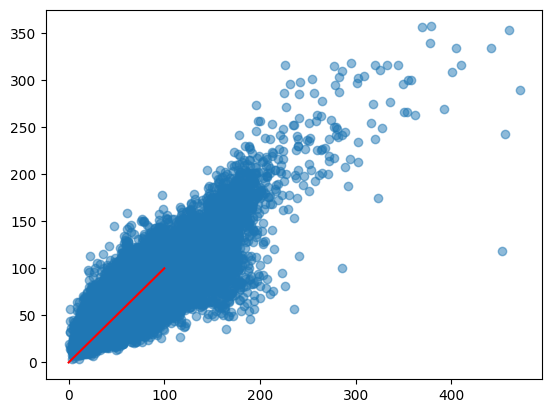

In [50]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(y_valid, pred, alpha = 0.5)
plt.plot(np.linspace(0, 100, 300), np.linspace(0, 100, 300), "red")
plt.show()

In [51]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_valid, pred)
rmse = np.sqrt(mse)
print(rmse)

19.27668195757787


In [60]:
pred2 = model.predict(test_x)
print(pred2)

[23.07655708 38.65275045 26.50011584 ... 71.29810817 37.78399287
 37.19381078]


In [62]:
submission = pd.read_csv('/content/drive/MyDrive/Python/machine_learning/Signate/sony/file/submit_sample.csv', names=["id", "pm2.5"])

In [63]:
submission.shape

(53509, 2)

In [64]:
submission.head()

,id,pm2.5
0,195942,54.321
1,195943,54.321
2,195944,54.321
3,195945,54.321
4,195946,54.321


In [65]:
submission["pm2.5"] = pred2

In [66]:
submission.shape

(53509, 2)

In [67]:
submission.head()

,id,pm2.5
0,195942,23.076557
1,195943,38.652750
2,195944,26.500116
3,195945,55.645249
4,195946,133.489797


In [75]:
# testデータでco_min co_mid o3_min o3_midが0のデータはpm2.5を0と予測する。
submission['boo'] = submission["id"].isin(testId)

In [69]:
submission[submission['boo']==True].count()

id       106
pm2.5    106
boo      106
dtype: int64

In [70]:
submission

,id,pm2.5,boo
0,195942,23.076557,False
1,195943,38.652750,False
2,195944,26.500116,False
3,195945,55.645249,False
4,195946,133.489797,False
...,...,...,...
53504,249446,82.094197,False
53505,249447,108.065041,False
53506,249448,71.298108,False
53507,249449,37.783993,False


In [71]:
submission['pm2.5'].mask(submission['boo']==True,0,inplace=True)

In [72]:
submission[submission['pm2.5']==0].count()

id       106
pm2.5    106
boo      106
dtype: int64

In [73]:
submission.drop('boo',axis=1,inplace=True)

In [74]:
submission

,id,pm2.5
0,195942,23.076557
1,195943,38.652750
2,195944,26.500116
3,195945,55.645249
4,195946,133.489797
...,...,...
53504,249446,82.094197
53505,249447,108.065041
53506,249448,71.298108
53507,249449,37.783993


In [ ]:
submission.to_csv('/content/drive/MyDrive/Signate/sony/file/submission_result_40000_cityあり.csv', header=False, index=False)